<a href="https://colab.research.google.com/github/surapitttha/Python-upskill/blob/main/Heart_Attack_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets

In [3]:
import opendatasets as od

In [10]:
url = 'https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset'


In [11]:
od.download(url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: surapitthaibkhuang
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset


100%|██████████| 4.11k/4.11k [00:00<00:00, 1.53MB/s]

In [6]:
import os

In [12]:
os.listdir('./heart-attack-analysis-prediction-dataset')

['o2Saturation.csv', 'heart.csv']

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import warnings

In [17]:
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [47]:
df = pd.read_csv('/content/heart-attack-analysis-prediction-dataset/heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [20]:
df.shape

(303, 14)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [33]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
df['output'].value_counts()

output
1    165
0    138
Name: count, dtype: int64

In [34]:
df['output'].value_counts(normalize=True)

output
1    0.544554
0    0.455446
Name: proportion, dtype: float64

In [35]:
total = 165+138
d1 = 165/total
d2 = 138/total
d1,d2

(0.5445544554455446, 0.45544554455445546)

##DecisionTreeClassifier from scikit-learn

In [48]:
X = df.drop(['output'],axis=1)
Y = df.output

In [49]:
X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [50]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

In [55]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

###Train Model


In [56]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(X_train,y_train)

DecisionTreeClassifier()

In [57]:
X.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall'],
      dtype='object')

In [59]:
import matplotlib.pyplot as plt

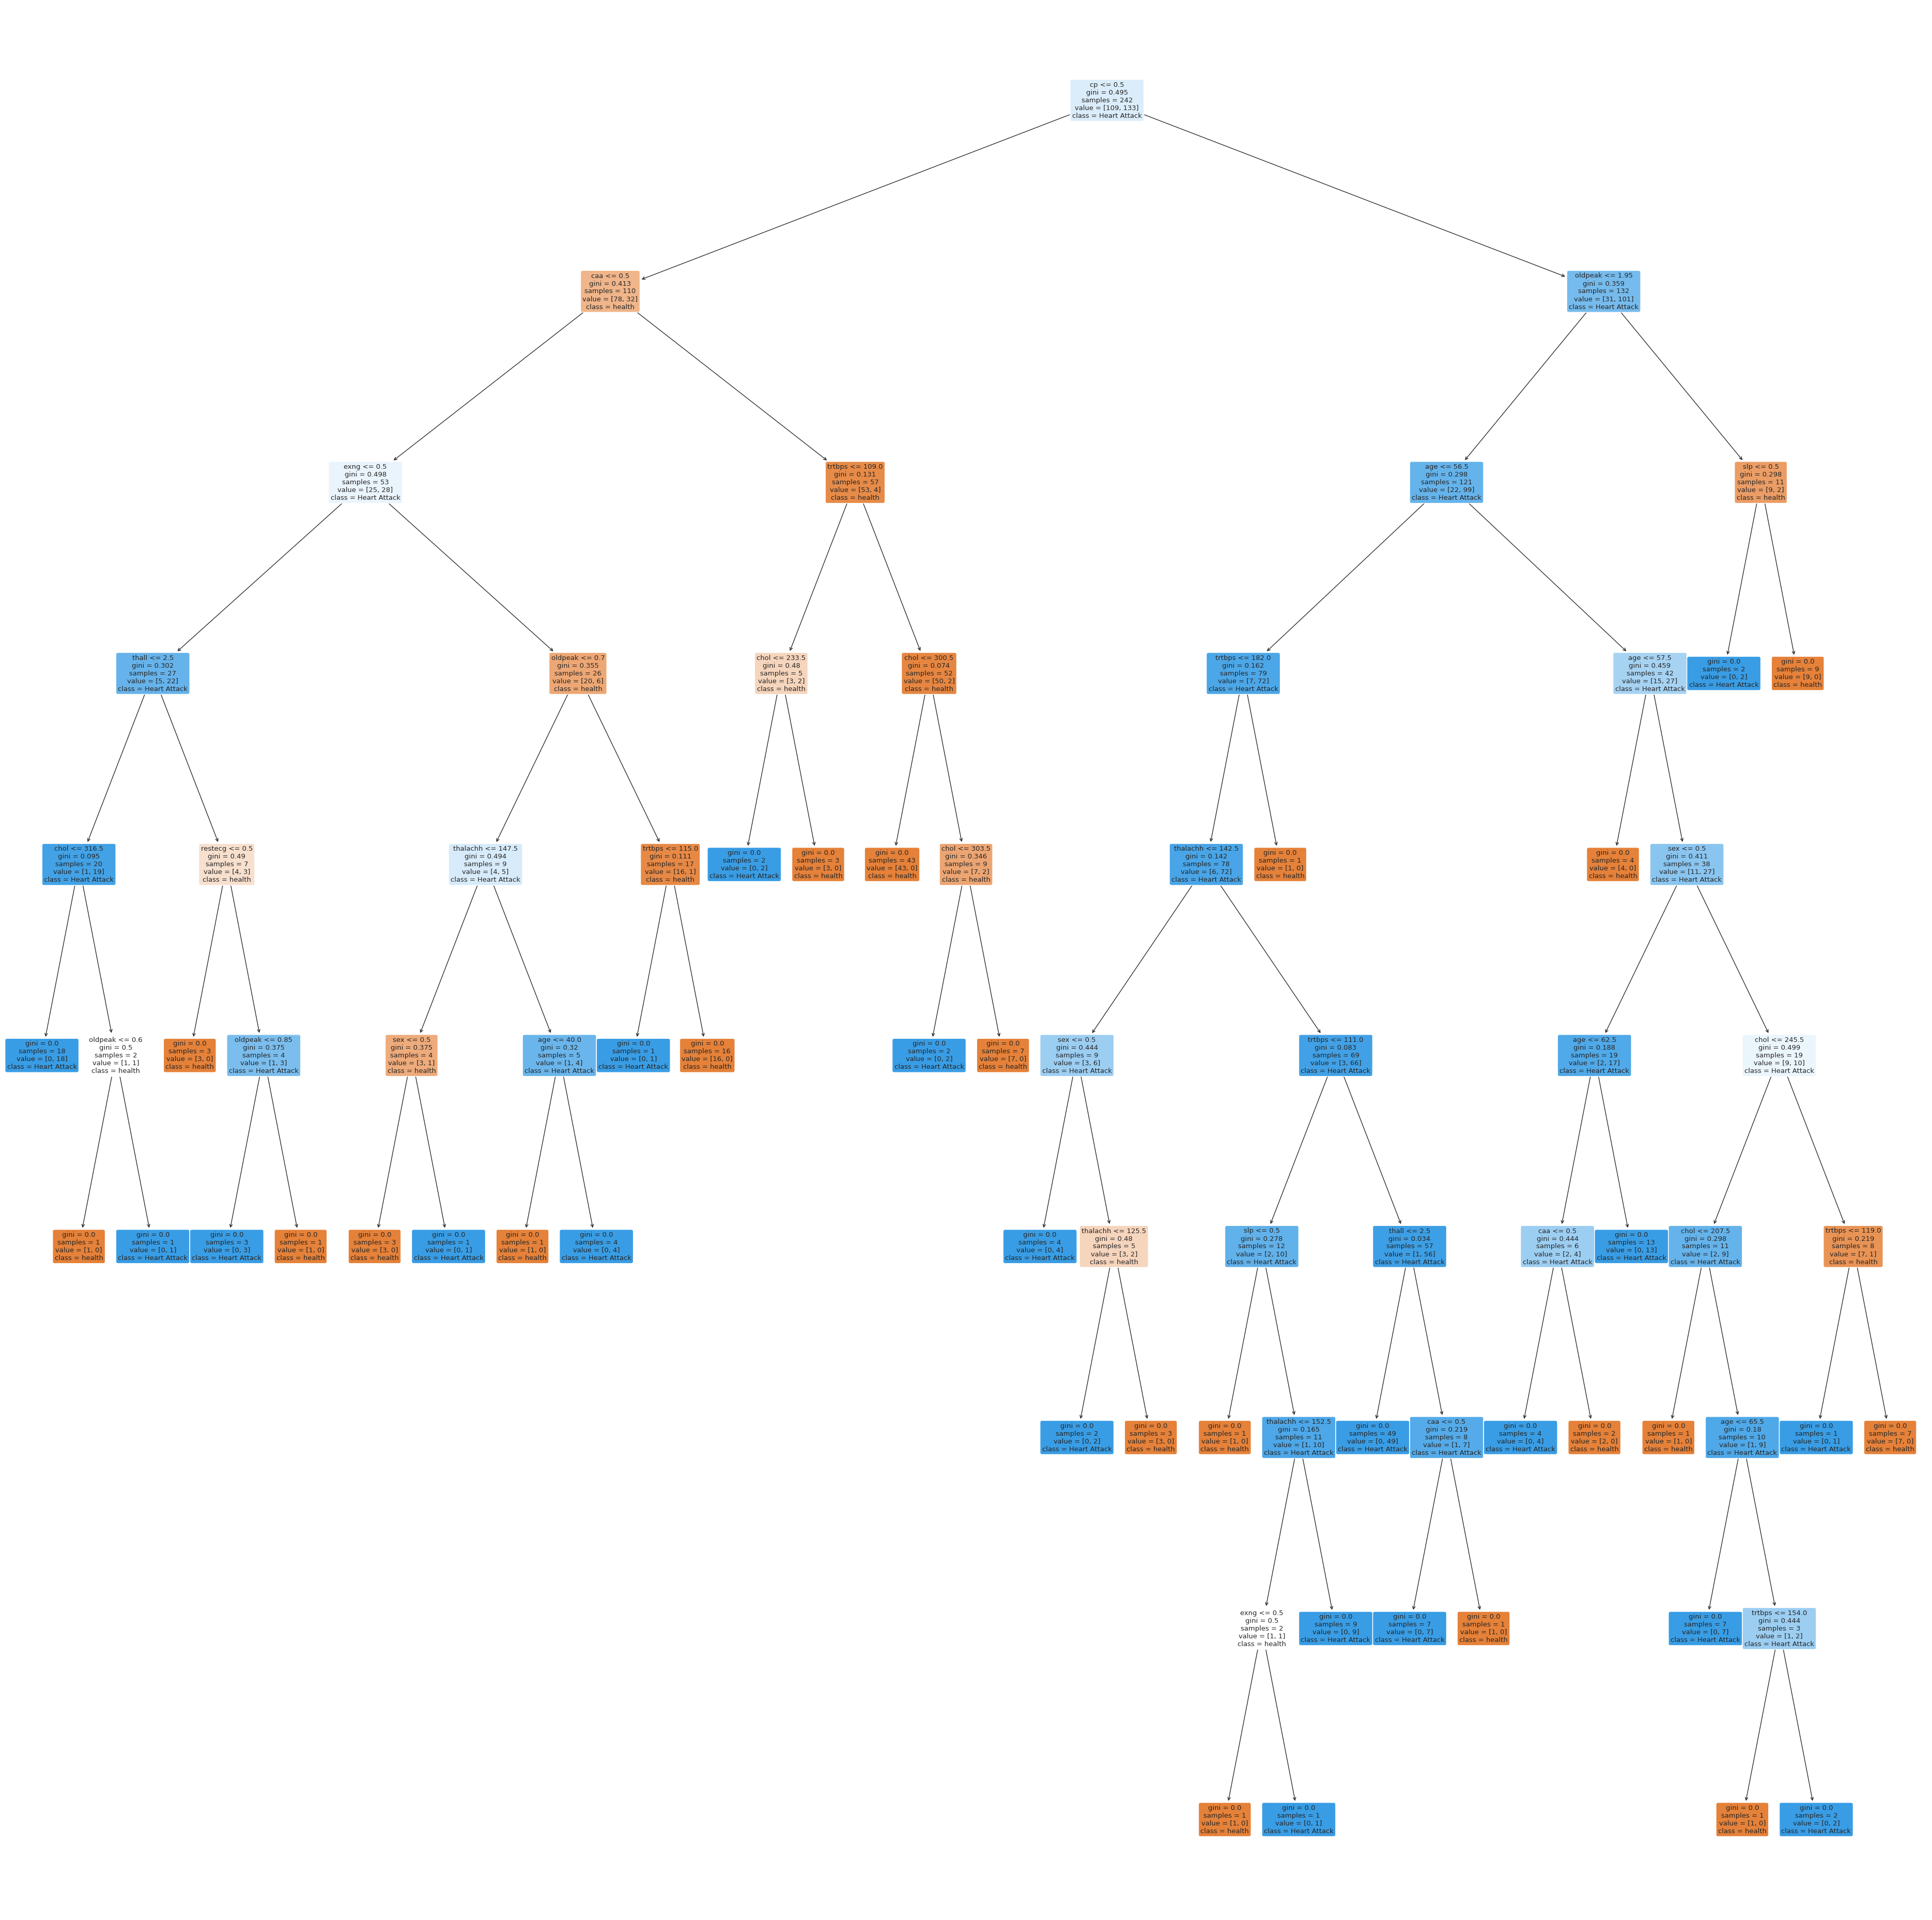

In [63]:
from sklearn.tree import plot_tree

# data_feature_names = ['size']
data_feature_names = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall']

plt.subplots(nrows=1, ncols=1, figsize=(50, 50), dpi=96)
# plt.figure(figsize=(6,6))

plot_tree(model,
         filled=True, rounded=True,
         feature_names=data_feature_names,
         class_names=['health','Heart Attack'])

plt.show()

In [64]:
from mlxtend.plotting import plot_decision_regions

In [70]:
X= np.array(X_train[0:1])
y= np.array(y_train)
# plot needs Numpy
X

array([[ 42.,   1.,   1., 120., 295.,   0.,   1., 162.,   0.,   0.,   2.,
          0.,   2.]])

##Heart_acttack neural Network from scratch

In [90]:
df = pd.read_csv('/content/heart-attack-analysis-prediction-dataset/heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [91]:
y=np.array(df['output'])
y[:5]

array([1, 1, 1, 1, 1])

In [92]:
df_bkp = df.copy()
df.drop(['output'],inplace=True,axis=1)

In [93]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [94]:
x = np.array(df)
x[:5]

array([[ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
          2.3,   0. ,   0. ,   1. ],
       [ 37. ,   1. ,   2. , 130. , 250. ,   0. ,   1. , 187. ,   0. ,
          3.5,   0. ,   0. ,   2. ],
       [ 41. ,   0. ,   1. , 130. , 204. ,   0. ,   0. , 172. ,   0. ,
          1.4,   2. ,   0. ,   2. ],
       [ 56. ,   1. ,   1. , 120. , 236. ,   0. ,   1. , 178. ,   0. ,
          0.8,   2. ,   0. ,   2. ],
       [ 57. ,   0. ,   0. , 120. , 354. ,   0. ,   1. , 163. ,   1. ,
          0.6,   2. ,   0. ,   2. ]])

In [95]:
print(x.shape)
print(y.shape)

(303, 13)
(303,)


In [96]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [97]:
scaler = StandardScaler() # Normal distribution based scaling
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

In [79]:
x_test_scale[:5]


array([[-1.35679832,  0.72250438,  0.00809909, -0.61685555,  0.91403366,
        -0.38330071,  0.8431327 ,  0.53278078, -0.67663234, -0.92086403,
         0.95390513, -0.68970073, -0.50904773],
       [ 0.38508599,  0.72250438, -0.97189094,  1.1694912 ,  0.43952674,
        -0.38330071, -1.04610909, -1.75358236,  1.47790748, -0.19378705,
         0.95390513, -0.68970073,  1.17848036],
       [-0.92132724,  0.72250438,  0.98808912,  1.1694912 , -0.30070405,
        -0.38330071,  0.8431327 , -0.13967897, -0.67663234,  2.3509824 ,
        -0.69498803, -0.68970073, -0.50904773],
       [ 0.05848269, -1.38407465,  0.00809909,  0.27631782,  0.0599212 ,
        -0.38330071, -1.04610909,  0.48795013, -0.67663234,  0.35152069,
        -0.69498803, -0.68970073, -0.50904773],
       [ 0.60282153,  0.72250438, -0.97189094, -0.79549023, -0.31968433,
         2.60891771,  0.8431327 ,  0.44311948,  1.47790748,  0.35152069,
         0.95390513,  1.33342142,  1.17848036]])

In [99]:
x_test_scale[:5]

array([[ 0.27621823,  0.72250438, -0.97189094,  1.1694912 ,  0.5534084 ,
        -0.38330071, -1.04610909, -1.70875171,  1.47790748, -0.37555629,
        -0.69498803,  0.32186034, -2.19657581],
       [ 0.49395376,  0.72250438,  1.96807914,  2.36038903,  0.78117172,
        -0.38330071, -1.04610909,  0.39828883, -0.67663234, -0.73909479,
        -0.69498803, -0.68970073,  1.17848036],
       [ 0.27621823,  0.72250438,  0.98808912,  1.1694912 , -2.29363312,
         2.60891771,  0.8431327 ,  1.02591793, -0.67663234, -0.73909479,
         0.95390513,  0.32186034,  1.17848036],
       [ 0.16735046, -1.38407465, -0.97189094,  0.21677293,  3.07778522,
        -0.38330071, -1.04610909, -0.00518702,  1.47790748,  0.80594381,
        -0.69498803,  1.33342142,  1.17848036],
       [ 1.800367  , -1.38407465,  0.98808912, -1.21230447,  0.34462536,
         2.60891771, -1.04610909, -0.90180001, -0.67663234, -0.92086403,
         0.95390513,  0.32186034, -0.50904773]])

###Define Neural Network Class

In [100]:
class NeuralNetwork:
    def __init__(self, LR, x_train, y_train, x_test, y_test):
        self.w = np.random.randn(x_train_scale.shape[1]) #weight
        self.b = np.random.randn() #bias\
        self.LR = LR
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test
        self.train_loss = []
        self.test_loss = []

    # sigmoid
    def activation(self, x):
        return 1/(1+np.exp(-x))

    # derivative of sigmoid
    def dactivation(self, x):
        return self.activation(x) * (1-self.activation(x))

    def forward(self, x):
        # dotproduct
        hidden_1 = np.dot(x, self.w) + self.b
        activate_1 = self.activation(hidden_1)
        return activate_1

    def backward(self, x, y_true):
        # calculate gradients
        hidden_1 = np.dot(x, self.w) + self.b
        y_pred = self.forward(x)
        # derivative of the losses to the predictions
        dloss_pred = 2 * (y_pred - y_true)
        # derivative prediction to hidden layer
        dpred_dhidden1 = self.dactivation(hidden_1)
        # derivative of hidden layer and biases
        dhidden1_db = 1
        dhidden1_dw = x

        # derivative loss to biass
        dl_db = dloss_pred * dpred_dhidden1 * dhidden1_db
        # deruvatuve kiss ti weight
        dl_dw = dloss_pred * dpred_dhidden1 * dhidden1_dw
        return dl_db, dl_dw

    def optimizer(self, dl_db, dl_dw):
        # update weights
        self.b = self.b - dl_db * self.LR
        self.w = self.w - dl_dw * self.LR

    def train(self, itter):
        for i in range(itter):
            # random positions
            random_pos = np.random.randint(len(self.x_train))

            # forward pass
            y_train_true = self.y_train[random_pos]
            y_train_pred = self.forward(self.x_train[random_pos])

            # Calculate training losses
            loss = np.square(y_train_pred - y_train_true)
            self.train_loss.append(loss)

            # Calculate gradients
            dl_db, dl_dw = self.backward(self.x_train[random_pos],
                                        y_train[random_pos])

            # Update weights
            self.optimizer(dl_db, dl_dw)

            # Calc error for the test data
            loss_sum = 0
            for c in range(len(self.x_test)):
                y_true = self.y_test[c]
                y_pred = self.forward(self.x_test[c])
                loss_sum += np.square(y_pred-y_true)
            self.test_loss.append(loss_sum)
        return "training is completed"

###Hyper Parameters¶


In [104]:
LR =0.01
itter = 10000

###Model Instance and Training¶


In [105]:
nn = NeuralNetwork(LR=LR,x_train=x_train_scale,
                   y_train=y_train,
                   x_test=x_test_scale,
                  y_test=y_test)
nn.train(itter=itter)

'training is completed'

###Check losses¶


<Axes: >

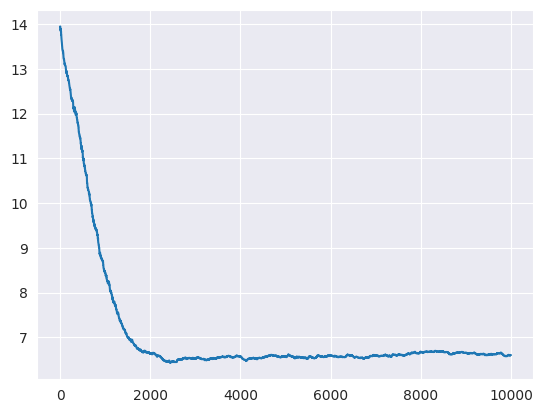

In [106]:
# Test
sns.lineplot(x= list(range(len(nn.test_loss))),
             y = nn.test_loss)

###Iterate over test data

In [107]:
total = x_test_scale.shape[0]
correct = 0
y_preds = []
for i in range(total):
    y_true = y_test[i]
    y_pred = np.round(nn.forward(x_test_scale[i]))
    y_preds.append(y_pred)
    correct += 1 if y_true == y_pred else 0

In [108]:
print(total)
print(correct)
print(f"Accuracy: {correct/total}")

61
52
Accuracy: 0.8524590163934426


###Baseline Classifier

In [109]:
from collections import Counter
Counter(y_test)

Counter({0: 29, 1: 32})

###Confusion Matrix

In [110]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Calculate precision
precision = precision_score(y_test, y_preds)

# Calculate recall
recall = recall_score(y_test, y_preds)

# Calculate F1 score
f1 = f1_score(y_test, y_preds)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_preds)

# Calculate specificity (true negative rate)
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# Calculate false positive rate
fpr = conf_matrix[0, 1] / (conf_matrix[0, 1] + conf_matrix[0, 0])

# Print the calculated metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Specificity:", specificity)
print("False Positive Rate:", fpr)
print("Confusion Matrix:")
print(conf_matrix)

Precision: 0.8709677419354839
Recall: 0.84375
F1 Score: 0.8571428571428571
Specificity: 0.8620689655172413
False Positive Rate: 0.13793103448275862
Confusion Matrix:
[[25  4]
 [ 5 27]]


In [115]:
#scikit-learn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

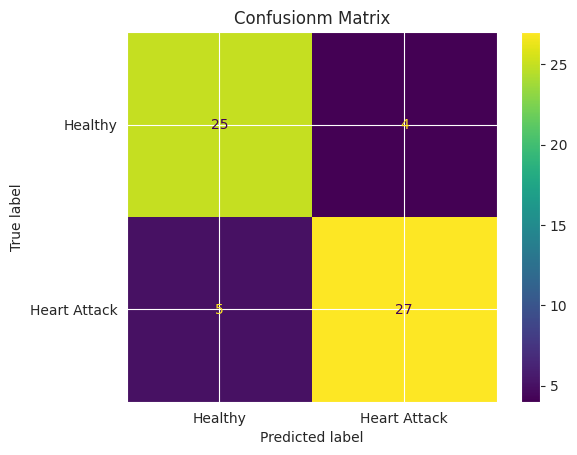

In [116]:
labels = ['Healthy','Heart Attack']

cm = confusion_matrix(y_test, y_preds)

ConfusionMatrixDisplay(conf_matrix,display_labels=labels).plot()

plt.title('Confusionm Matrix')
plt.show()